<a href="https://colab.research.google.com/github/iraseel74/mining-project/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

some graphs :

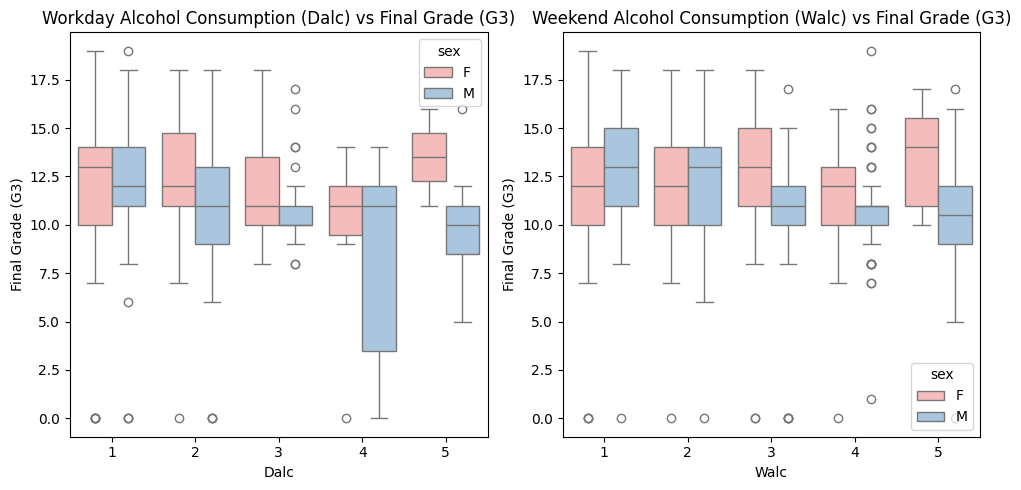

In [1]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
plt.figure(figsize=(10, 5))
custom_palette = {'F': '#FFB2B2', 'M': '#A1C6E7'} # custom color palette
data = pd.read_csv('student-por.csv')
# Boxplot for Dalc vs G3 (Final Grade)
plt.subplot(1, 2, 1)
sns.boxplot(x='Dalc', y='G3', data=data, palette=custom_palette, hue='sex')
plt.title('Workday Alcohol Consumption (Dalc) vs Final Grade (G3)')
plt.xlabel('Dalc')
plt.ylabel('Final Grade (G3)')

# Boxplot for Walc vs G3 (Final Grade)
plt.subplot(1, 2, 2)
sns.boxplot(x='Walc', y='G3', data=data, palette=custom_palette, hue='sex')
plt.title('Weekend Alcohol Consumption (Walc) vs Final Grade (G3)')
plt.xlabel('Walc')
plt.ylabel('Final Grade (G3)')

plt.tight_layout()
plt.show()


we used box plot to see the distrbution batween Dalc and Walc with the final grade plus the diffrence between female and male

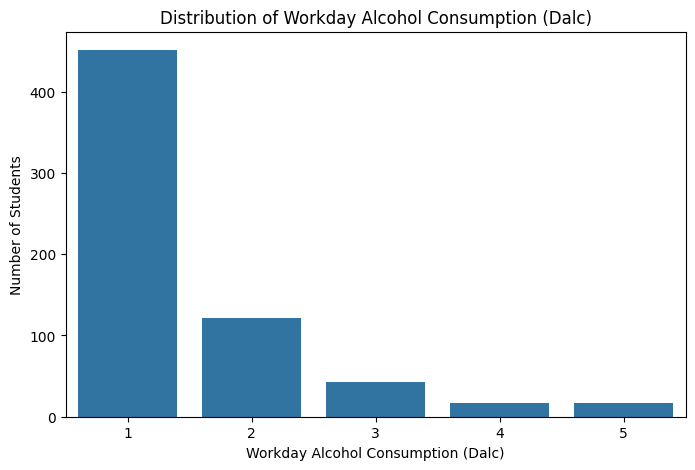

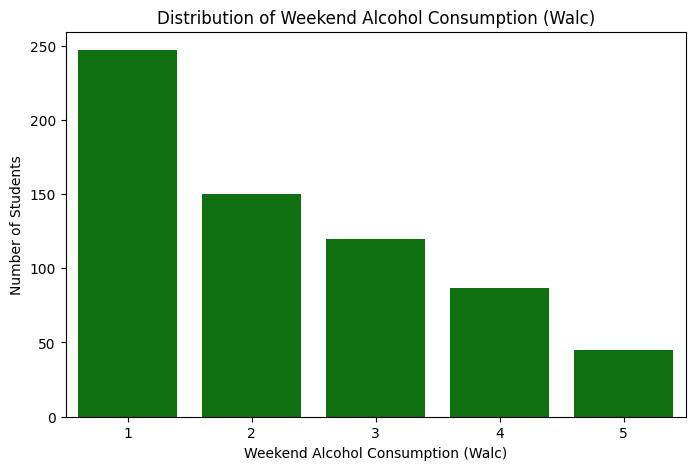

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('student-por.csv')

# a bar chart for the distribution of Dalc (Workday Alcohol Consumption)

plt.figure(figsize=(8, 5))
sns.countplot(x='Dalc', data=data)
plt.title('Distribution of Workday Alcohol Consumption (Dalc)')
plt.xlabel('Workday Alcohol Consumption (Dalc)')
plt.ylabel('Number of Students')
plt.show()

# a bar chart for the distribution of Walc (weekend Alcohol Consumption)

plt.figure(figsize=(8, 5))
sns.countplot(x='Walc', data=data, color='green')
plt.title('Distribution of Weekend Alcohol Consumption (Walc)')
plt.xlabel('Weekend Alcohol Consumption (Walc)')
plt.ylabel('Number of Students')
plt.show()


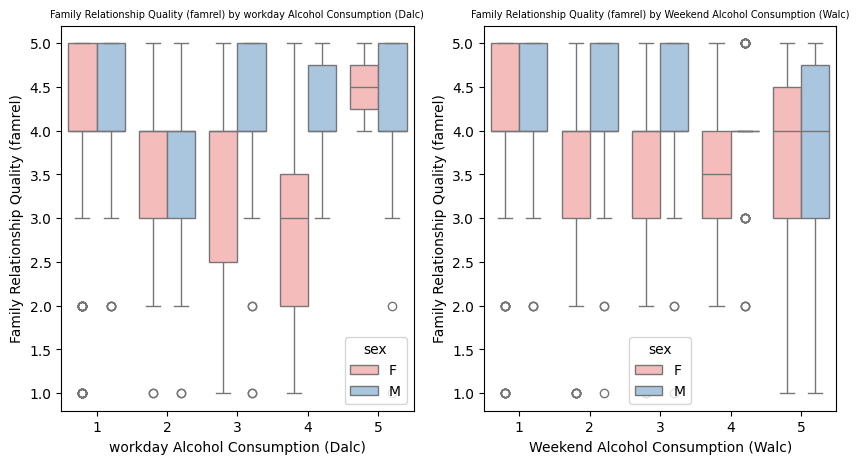

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('student-por.csv')

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Dalc', y='famrel', data=data, palette=custom_palette, hue='sex')
plt.title('Family Relationship Quality (famrel) by workday Alcohol Consumption (Dalc)', fontsize=7)
plt.xlabel('workday Alcohol Consumption (Dalc)')
plt.ylabel('Family Relationship Quality (famrel)')

plt.subplot(1, 2, 2)
sns.boxplot(x='Walc', y='famrel', data=data, palette=custom_palette, hue='sex')
plt.title('Family Relationship Quality (famrel) by Weekend Alcohol Consumption (Walc)', fontsize=7)
plt.xlabel('Weekend Alcohol Consumption (Walc)')
plt.ylabel('Family Relationship Quality (famrel)')
plt.show()

The chart (box plot)shows that family relationship quality (Famrel) varies with alcohol consumption on workdays.
Individuals who consume alcohol heavily during workdays tend to have lower family relationship quality based on gender.

The chart (box plot)shows that family relationship quality (Famrel) varies with alcohol consumption on weekend .

 A similar trend appears, where individuals who consume a lot of alcohol on weekends may also experience lower family relationship qualit based on gender.

The effect of workday alcohol consumption may be more pronounced on family relationship quality compared to weekend consumption.

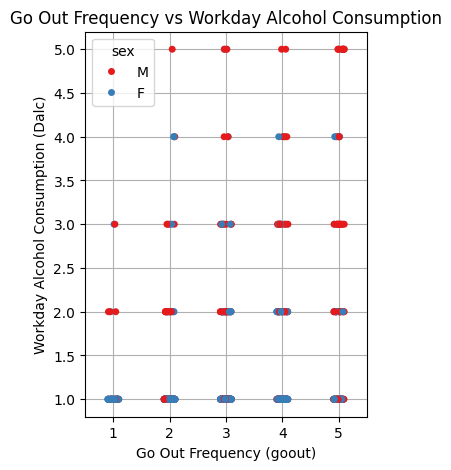

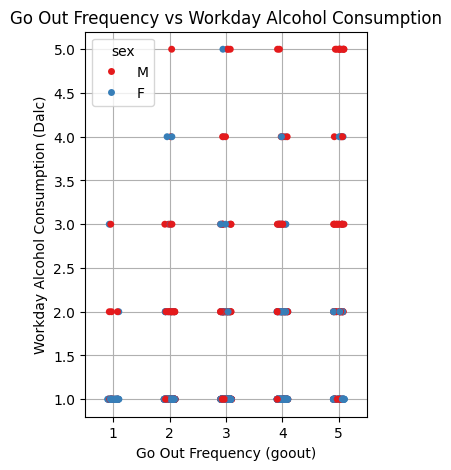

In [4]:
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
sns.stripplot(x='goout', y='Dalc', data=data, palette='Set1', hue='sex')
plt.title('Go Out Frequency vs Workday Alcohol Consumption')
plt.xlabel('Go Out Frequency (goout)')
plt.ylabel('Workday Alcohol Consumption (Dalc)')
plt.grid()

plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)

sns.stripplot(x='goout', y='Dalc', data=data, palette='Set1', hue='sex')
plt.title('Go Out Frequency vs Workday Alcohol Consumption')
plt.xlabel('Go Out Frequency (goout)')
plt.ylabel('Workday Alcohol Consumption (Dalc)')
plt.grid()
plt.show()

the chart (scatter) above indicates a relationship between Go Out Frequency and Workday Alcohol Consumption
Individuals who go out more often tend to consume higher amounts of alcohol on workdays, indicating the influence of social activities on drinking behavior.
The data shows variations in alcohol consumption patterns between males (M) and females (F).

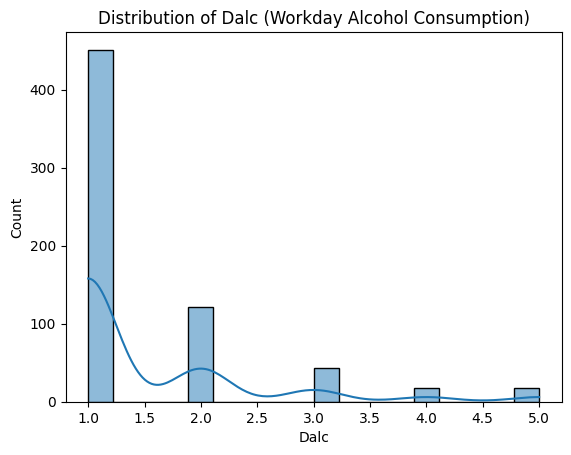

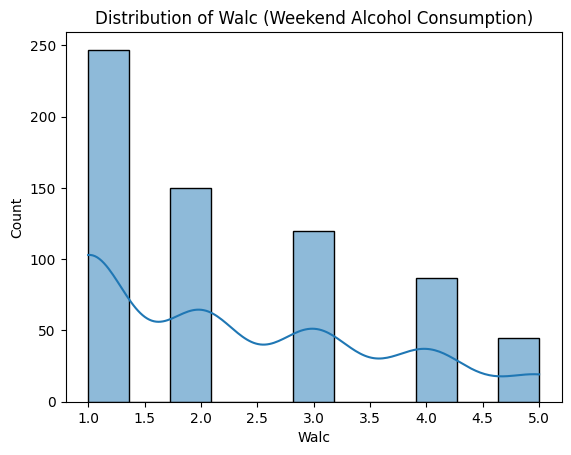

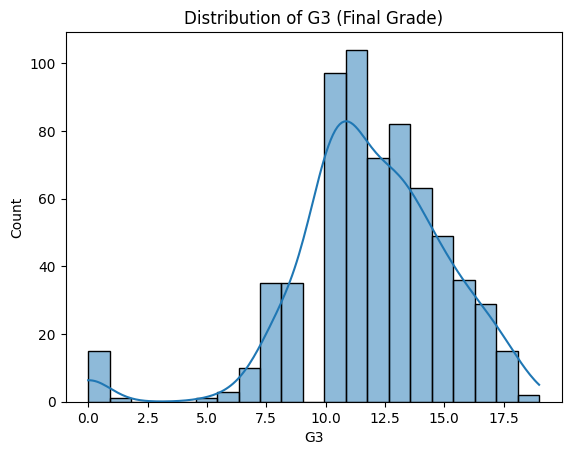

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visualize the distribution of Dalc
sns.histplot(data['Dalc'], kde=True)
plt.title('Distribution of Dalc (Workday Alcohol Consumption)')
plt.show()

# Visualize the distribution of Walc
sns.histplot(data['Walc'], kde=True)
plt.title('Distribution of Walc (Weekend Alcohol Consumption)')
plt.show()

# Visualize the distribution of G3
sns.histplot(data['G3'], kde=True)
plt.title('Distribution of G3 (Final Grade)')
plt.show()

checking for missing values, calculate mean and varince :

In [6]:
import pandas as pd

data = pd.read_csv('student-por.csv')

# Check for missing values in each column
missing_values = data.isna().sum()
print("missing values in each column:")
print(missing_values)
print("number of missing values= ", missing_values.sum())


variances = data.var(numeric_only=True)
print("variances of each numeric column:")
print(variances)

mean_values = data.mean(numeric_only=True)
print("mean values of each numeric column:")
print(mean_values)

missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64
number of missing values=  0
variances of each numeric column:
age            1.483859
Medu           1.287208
Fedu           1.209848
traveltime     0.560492
studytime      0.688086
failures       0.351928
famrel         0.913395
freetime       1.104796
goout          1.382426
Dalc           0.855319
Walc           1.649632
health         2.091665
absences      21.536642
G1             7.536481
G2             8.489290
G3   

now preprocessing :

but let's see the original data before preprocessing

In [7]:
print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

1- detect outliers and remove if any

In [8]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the dataset
data = pd.read_csv('student-por.csv')

# Detecting outliers for G3 using Z-scores
z_scores = np.abs(stats.zscore(data['G3']))
threshold_g3 = 3
outliers_g3 = data[z_scores > threshold_g3]
print("G3 outliers:")
print(outliers_g3)

# Detecting outliers for Dalc (Workday Alcohol Consumption) using the IQR method
Q1_dalc = data['Dalc'].quantile(0.25)
Q3_dalc = data['Dalc'].quantile(0.75)
IQR_dalc = Q3_dalc - Q1_dalc
lower_bound_dalc = Q1_dalc - 1.5 * IQR_dalc
upper_bound_dalc = Q3_dalc + 1.5 * IQR_dalc
outliers_dalc = data[(data['Dalc'] < lower_bound_dalc) | (data['Dalc'] > upper_bound_dalc)]
print("Dalc outliers:")
print(outliers_dalc)

# Detecting outliers for Walc (Weekend Alcohol Consumption) using the IQR method
Q1_walc = data['Walc'].quantile(0.25)
Q3_walc = data['Walc'].quantile(0.75)
IQR_walc = Q3_walc - Q1_walc
lower_bound_walc = Q1_walc - 1.5 * IQR_walc
upper_bound_walc = Q3_walc + 1.5 * IQR_walc
outliers_walc = data[(data['Walc'] < lower_bound_walc) | (data['Walc'] > upper_bound_walc)]
print("Walc outliers:")
print(outliers_walc)

# Remove outliers from G3, Dalc, and Walc
data_no_outliers = data[(z_scores <= threshold_g3) &
                        (data['Dalc'] >= lower_bound_dalc) &
                        (data['Dalc'] <= upper_bound_dalc) &
                        (data['Walc'] >= lower_bound_walc) &
                        (data['Walc'] <= upper_bound_walc)]

print("Data after removing outliers:")
print(data_no_outliers)

# Save the modified dataset without outliers
data_no_outliers.to_csv('student-por-no-outliers.csv', index=False)

G3 outliers:
    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
163     GP   M   18       U     LE3       T     1     1     other     other   
172     GP   M   16       U     GT3       T     3     3     other  services   
440     MS   M   16       U     GT3       T     1     1   at_home  services   
519     MS   M   16       R     GT3       T     2     1     other  services   
563     MS   M   17       U     GT3       T     2     2     other     other   
567     MS   M   18       R     GT3       T     3     2  services     other   
583     MS   F   18       R     GT3       T     2     2     other     other   
586     MS   F   17       U     GT3       T     4     2   teacher  services   
597     MS   F   18       R     GT3       T     2     2   at_home     other   
603     MS   F   18       R     LE3       A     4     2   teacher     other   
605     MS   F   19       U     GT3       T     1     1   at_home  services   
610     MS   F   19       R     GT3    

2- encoding categorical data (Transformation)

In [9]:
from sklearn.preprocessing import LabelEncoder
from scipy import stats
data_encoding = data_no_outliers.copy()  # Create a copy to ensure original data is not modified

# Initialize LabelEncoder
le = LabelEncoder()

# Encode categorical columns
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                    'Mjob', 'Fjob', 'reason', 'guardian',
                    'schoolsup', 'famsup', 'paid',
                    'activities', 'nursery', 'higher',
                    'internet', 'romantic']

for col in categorical_cols:
    data_encoding[col] = le.fit_transform(data_encoding[col])

# Save the encoded dataset
data_encoding.to_csv('student-por-encoded.csv', index=False)

# Print the encoded dataset
print(data_encoding)

     school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0         0    0   18        1        0        0     4     4     0     4  ...   
1         0    0   17        1        0        1     1     1     0     2  ...   
2         0    0   15        1        1        1     1     1     0     2  ...   
3         0    0   15        1        0        1     4     2     1     3  ...   
4         0    0   16        1        0        1     3     3     2     2  ...   
..      ...  ...  ...      ...      ...      ...   ...   ...   ...   ...  ...   
644       1    0   19        0        0        1     2     3     3     2  ...   
645       1    0   18        1        1        1     3     1     4     3  ...   
646       1    0   18        1        0        1     1     1     2     2  ...   
647       1    1   17        1        1        1     3     1     3     3  ...   
648       1    1   18        0        1        1     3     2     3     2  ...   

     famrel  freetime  goou

3-Normalization

In [14]:
import pandas as pd

data_normalization = data_encoding.copy()  # Create a copy to ensure original data is not modified

# Columns to normalize
columns_to_normalize = ['age', 'Medu', 'Fedu', 'Mjob','Fjob','reason','traveltime','studytime','famrel','freetime','goout','Dalc','Walc','health','G1','G2','G3']

# Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = data_normalization[column].abs().max()
    data_normalization[column] = data_normalization[column] / (10 ** len(str(int(max_abs_value))))

# Save the normalized dataset
data_normalization.to_csv('student-por-normalization.csv', index=False)

print("DataFrame after Decimal Scaling Normalization:")
print(data_normalization)

DataFrame after Decimal Scaling Normalization:
     school  sex   age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0         0    0  0.18        1        0        0   0.4   0.4   0.0   0.4   
1         0    0  0.17        1        0        1   0.1   0.1   0.0   0.2   
2         0    0  0.15        1        1        1   0.1   0.1   0.0   0.2   
3         0    0  0.15        1        0        1   0.4   0.2   0.1   0.3   
4         0    0  0.16        1        0        1   0.3   0.3   0.2   0.2   
..      ...  ...   ...      ...      ...      ...   ...   ...   ...   ...   
644       1    0  0.19        0        0        1   0.2   0.3   0.3   0.2   
645       1    0  0.18        1        1        1   0.3   0.1   0.4   0.3   
646       1    0  0.18        1        0        1   0.1   0.1   0.2   0.2   
647       1    1  0.17        1        1        1   0.3   0.1   0.3   0.3   
648       1    1  0.18        0        1        1   0.3   0.2   0.3   0.2   

     ...  famrel  freetime  

4-Discretization

In [17]:
import pandas as pd

data_discre = data_normalization.copy()

median_abs = data_discre['absences'].median()

data_discre['absences'].fillna(median_abs, inplace=True)

abs_label = ['Low', 'Medium', 'High']

# Set duplicates='drop' to handle duplicate bin edges
data_discre['absences']= pd.qcut(data_discre['absences'], q=4, labels=abs_label, duplicates='drop')

data_discre.to_csv('student-por-discre.csv', index=False)
print(data_discre)

     school  sex   age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  \
0         0    0  0.18        1        0        0   0.4   0.4   0.0   0.4   
1         0    0  0.17        1        0        1   0.1   0.1   0.0   0.2   
2         0    0  0.15        1        1        1   0.1   0.1   0.0   0.2   
3         0    0  0.15        1        0        1   0.4   0.2   0.1   0.3   
4         0    0  0.16        1        0        1   0.3   0.3   0.2   0.2   
..      ...  ...   ...      ...      ...      ...   ...   ...   ...   ...   
644       1    0  0.19        0        0        1   0.2   0.3   0.3   0.2   
645       1    0  0.18        1        1        1   0.3   0.1   0.4   0.3   
646       1    0  0.18        1        0        1   0.1   0.1   0.2   0.2   
647       1    1  0.17        1        1        1   0.3   0.1   0.3   0.3   
648       1    1  0.18        0        1        1   0.3   0.2   0.3   0.2   

     ...  famrel  freetime  goout  Dalc  Walc  health  absences    G1    G2